# 실무예제 3-1

## 다음은 2013년 전국 주요지점별 유동인구 수 현황의 일부이다. 남자20대 vs. 여자20대, 남자10대 vs. 여자50대의 상관계수를 구하여 비교해 보고, 중복 속성으로 판단할 수 있을지 검토해 보시오.

### 데이터 파일 : ch3-1(유동인구수).csv

### 원본 투플수 : 23,221개

In [1]:
# ch3-1.py
import pandas as pd
import numpy as np

# matplotlib : 자료를 차트(chart)나 플롯(plot)으로 시각화(visulaization)하는 패키지
# pyplot : matlab이라는 수치해석 소프트웨어의 시각화 명령을 거의 그대로 사용할 수 있도록 
#          Matplotlib 의 하위 API를 포장(wrapping)한 명령어 집합을 제공
import matplotlib.pyplot as plt

# 데이터로드 (ch3-1.csv : 데이터 원본 파일)
# encoding : 윈도우즈 환경에서의 한글 처리
# engine : python 3.6에서 한글이 포함된 파일이름 사용
rawData = pd.read_csv('/Users/hayeon/Downloads/ch3-1(유동인구수).csv', encoding='CP949', engine='python')

In [2]:
rawData

,조사일자,시간대,X좌표,Y좌표,행정구역명,남자10대,남자20대,남자30대,남자40대,남자50대,여자10대,여자20대,여자30대,여자40대,여자50대
0,2010-06-21,12시~13시까지,343099,417482,대전광역시 서구 월평동,2,24,68,50,31,4,37,64,44,26
1,2010-06-21,19시~20시까지,343099,417482,대전광역시 서구 월평동,19,44,28,33,21,14,56,49,43,18
2,2010-06-20,12시~13시까지,343099,417482,대전광역시 서구 월평동,13,33,34,61,55,13,32,29,28,12
3,2010-06-20,19시~20시까지,343099,417482,대전광역시 서구 월평동,23,33,32,547,129,12,39,13,46,4
4,2010-06-21,12시~13시까지,343121,417343,대전광역시 서구 월평동,0,9,27,21,6,5,24,20,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23216,2010-07-03,19시~20시까지,316493,506876,경기도 오산시 궐동,20,55,60,56,26,22,45,34,25,15
23217,2010-07-07,12시~13시까지,295242,498726,경기도 화성시 장안면,11,17,22,35,40,8,15,33,25,42
23218,2010-07-07,19시~20시까지,295242,498726,경기도 화성시 장안면,25,13,29,23,55,31,17,37,19,45
23219,2010-07-10,12시~13시까지,295242,498726,경기도 화성시 장안면,12,15,35,31,45,10,12,31,25,37


In [8]:
# 상관계수 분석 (남자20대 vs. 여자20대) _numpy 
corr = np.corrcoef(rawData['남자20대'], rawData['여자20대'])
print(corr)

[[1.         0.84727982]
 [0.84727982 1.        ]]


- 남자 20대 유동인구가 많으면 여자 20대도 유동인구가 많다.
    * 절댓값이 크기 때문에 상관관계가 매우 강하다
        * 그렇다면 하나의 값만 넣자. 나머지 하나는 유추가 가능하기 때문이다. (중복으로 판단한다)

### np.corrcoef() : 인수로 사용된 두 속성 간의 상관계수를 구하는 numpy 패키지 함수

In [9]:
print("-- 상관계수(남자20대 vs. 여자20대) --")
print(corr)

-- 상관계수(남자20대 vs. 여자20대) --
[[1.         0.84727982]
 [0.84727982 1.        ]]


### 남자20대와 여자20대의 상관계수는 0.84 이상으로 두 속성 사이에는 강한 양의 상관관계가 존재
### -> 남자20대와 여자20대을 중복 속성으로 판단하여 하나의 속성을 분석 대상에서 제외해도 전체적인 분석결과에는 큰 영향을 미치지 않을 것으로 추정할 수 있음

In [2]:
# 차트 사이즈 설정 (inch 단위)
plt.figure(figsize=(8,6))

# scatter() : 산점도(scatter plot)를 그려주는 함수
plt.scatter(rawData['남자20대'], rawData['여자20대'], alpha=0.5)

# 차트 보여주기
plt.show()

NameError: name 'plt' is not defined

- x가 남자, y가 여자 


### figure() : 차트 환경을 설정하는 matplotlib.pyplot 패키지 함수
### scatter() : 산점도 차트를 그리는 함수
### show() : 차트를 화면에 출력하는 함수

-- 상관계수(남자10대 vs. 여자50대) --
[[1.         0.26322329]
 [0.26322329 1.        ]]


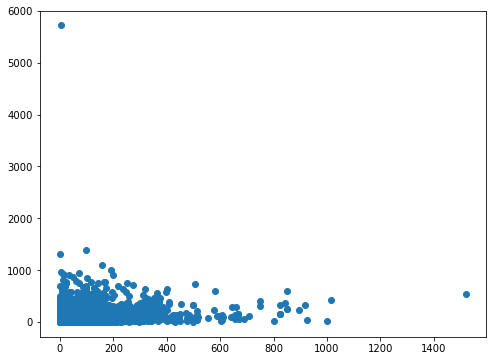

In [15]:
# 상관계수 분석 (남자10대 vs. 여자50대)
corr2 = np.corrcoef(rawData['남자10대'], rawData['여자50대'])

print("-- 상관계수(남자10대 vs. 여자50대) --")
print(corr2)

# 차트 그리기
plt.figure(figsize=(8,6))
plt.scatter(rawData['남자10대'], rawData['여자50대'])
plt.show()

### 남자10대와 여자50대의 상관계수는 0.26 정도로 두 속성 사이의 상관관계는 약한 양의 상관관계로 볼 수 있음
- 0.3 밑이면 상관관계가 거의 없다고 판단한다. 
    * 별개의 속성으로 판단하자. (중복아님)